# Generating a Predictive Model

## 1. Importing and Exploring Data

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [5]:
# Importing the data 
df = pd.read_csv('pgaTourData.csv')

# Examining the first 5 data
print(df.head())

      Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
0  Henrik Stenson    60.0               75.19  2018         291.5  73.51   
1     Ryan Armour   109.0               73.58  2018         283.5  68.22   
2     Chez Reavie    93.0               72.24  2018         286.5  68.67   
3      Ryan Moore    78.0               71.94  2018         289.2  68.80   
4    Brian Stuard   103.0               71.44  2018         278.9  67.12   

   Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
0          29.93               60.67         69.617    868   NaN     5.0   
1          29.31               60.13         70.758  1,006   1.0     3.0   
2          29.12               62.27         70.432  1,020   NaN     3.0   
3          29.17               64.16         70.015    795   NaN     5.0   
4          29.11               59.23         71.038    421   NaN     3.0   

   Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
0         

In [6]:
# Replace NaN with 0 in Top 10 
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

# Drop NaN values 
df.dropna(axis = 0, inplace=True)

In [7]:
# Change Rounds to int
df['Rounds'] = df['Rounds'].astype(int)

# Change Points to int 
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)

# Remove the $ and commas in money 
df['Money'] = df['Money'].apply(lambda x: x.replace('$',''))
df['Money'] = df['Money'].apply(lambda x: x.replace(',',''))
df['Money'] = df['Money'].astype(float)

In [8]:
df.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,78.769415,61.448614,2014.002987,290.786081,65.667103,29.163542,58.120687,70.922877,631.125448,0.206691,2.337515,0.025408,0.147527,0.037019,0.065192,0.020192,1.488682e+06
std,14.241512,5.057758,2.609352,8.908379,2.743211,0.518966,3.386783,0.698738,452.741472,0.516601,2.060691,0.344145,0.695400,0.379702,0.380895,0.223493,1.410333e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,3.000000,0.000000,0.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,2.465000e+04
25%,69.000000,57.955000,2012.000000,284.900000,63.832500,28.802500,55.902500,70.494250,322.000000,0.000000,1.000000,-0.187750,-0.260250,-0.190250,-0.180000,-0.123000,5.656412e+05
50%,80.000000,61.435000,2014.000000,290.500000,65.790000,29.140000,58.290000,70.904500,530.000000,0.000000,2.000000,0.040000,0.147000,0.055000,0.081000,0.022500,1.046144e+06
75%,89.000000,64.910000,2016.000000,296.375000,67.587500,29.520000,60.420000,71.343750,813.750000,0.000000,3.000000,0.258500,0.568500,0.287750,0.314500,0.175750,1.892478e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


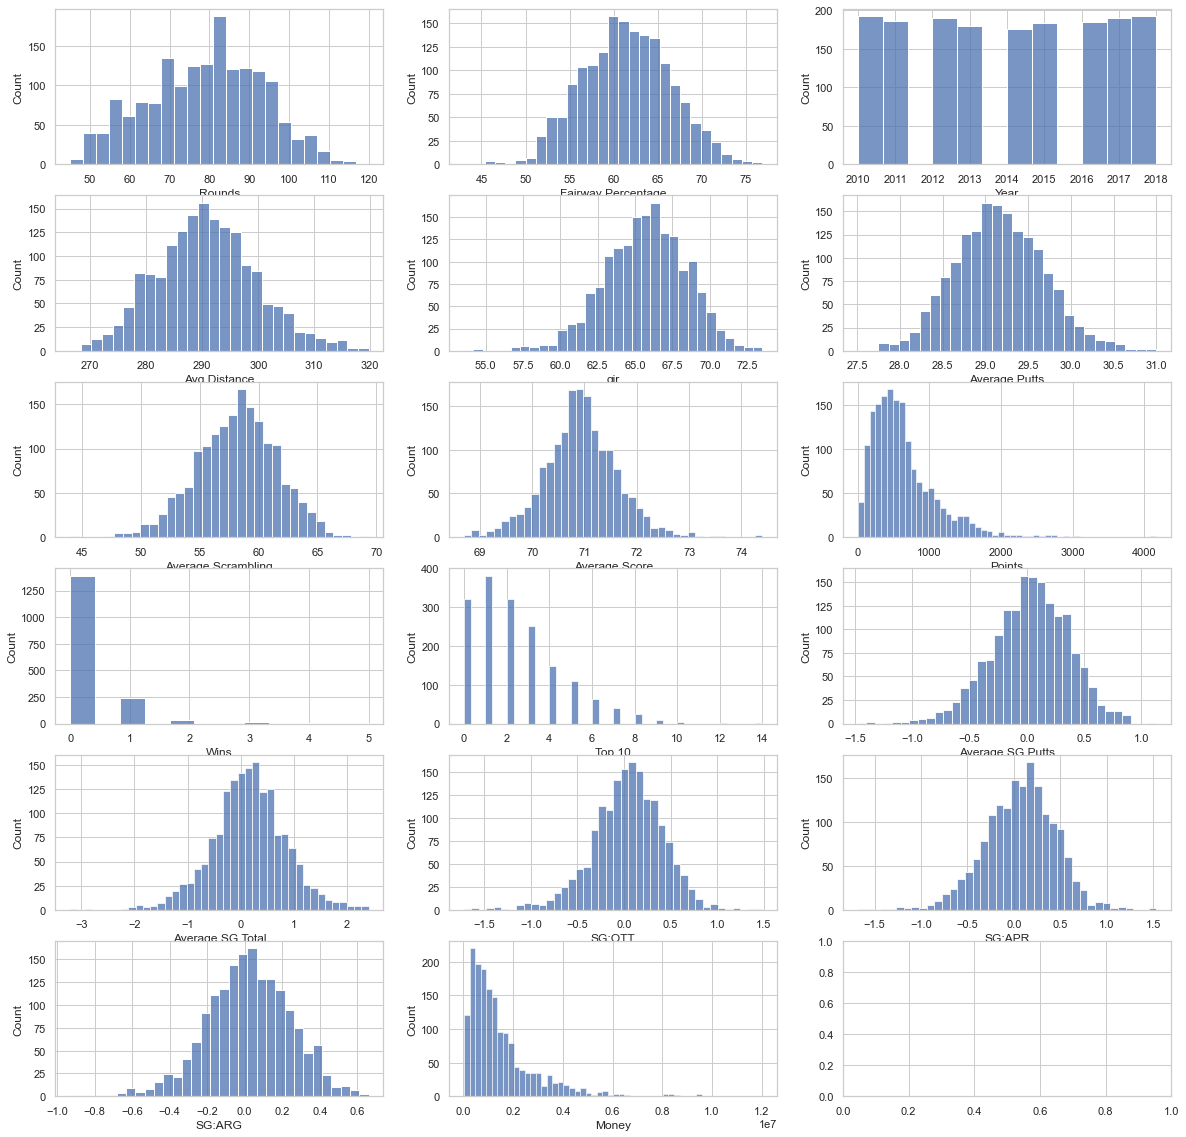

In [11]:
# Looking at the distribution of data
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
distribution = df.loc[:,df.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.histplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

## 2. Exploring Correlations

<AxesSubplot:>

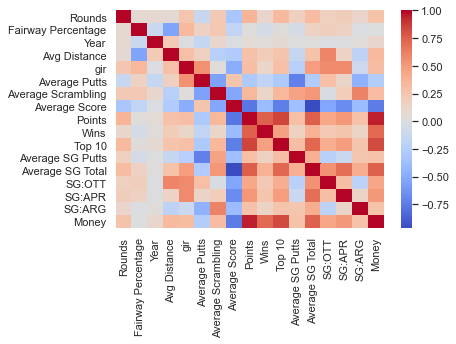

In [12]:
# Plot the correlation matrix between variables 
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm')

In [13]:
df.corr()['Average SG Total']

Rounds                0.319696
Fairway Percentage    0.162895
Year                  0.029388
Avg Distance          0.278270
gir                   0.489223
Average Putts        -0.265425
Average Scrambling    0.518277
Average Score        -0.962385
Points                0.761594
Wins                  0.384932
Top 10                0.725243
Average SG Putts      0.388954
Average SG Total      1.000000
SG:OTT                0.540811
SG:APR                0.695382
SG:ARG                0.408012
Money                 0.747042
Name: Average SG Total, dtype: float64

In [14]:
df.corr()['Wins']

Rounds                0.103162
Fairway Percentage   -0.047949
Year                  0.039006
Avg Distance          0.206294
gir                   0.120340
Average Putts        -0.168764
Average Scrambling    0.125193
Average Score        -0.390254
Points                0.750110
Wins                  1.000000
Top 10                0.473453
Average SG Putts      0.149155
Average SG Total      0.384932
SG:OTT                0.232414
SG:APR                0.259363
SG:ARG                0.134948
Money                 0.721665
Name: Wins, dtype: float64

### Conclusions:
* SG OTT is more highly-correlated (0.54) to SG Total than SG Putting (0.39)
* SG OTT is more highly-correlated (0.23) to Wins than SG Putting (0.15)

## 3. Logistic Regression - Predicting Wins

In [41]:
# Importing the Machine Learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [48]:
# Adding the Winner column to determine if the player won that year or not 
df['Winner'] = df['Wins'].apply(lambda x: 1 if x>0 else 0)
 
ml_df_putting = df.copy()
ml_df_driving = df.copy()

target = df['Winner']

# Removing columns
ml_df_putting.drop(['Player Name','Wins','Winner', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Score', 'Points', 'Top 10', 'Average SG Total', 'SG:APR', 'SG:OTT', 'Money', 'Rounds', 'Year'], axis=1, inplace=True)
ml_df_driving.drop(['Player Name','Wins','Winner', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points', 'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:ARG', 'Money', 'Rounds', 'Year'], axis=1, inplace=True)
print(ml_df_driving.head())

   Fairway Percentage  Avg Distance    gir  SG:OTT  SG:APR
0               75.19         291.5  73.51   0.427   0.960
1               73.58         283.5  68.22  -0.012   0.213
2               72.24         286.5  68.67   0.183   0.437
3               71.94         289.2  68.80   0.406   0.532
4               71.44         278.9  67.12  -0.227   0.099


In [38]:
# Function for the logisitic regression 
def log_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data = cf_mat)
    print(confusion)
    
    print(classification_report(y_test, y_pred))
    
    # Returning the 5 important features 
    rfe = RFE(clf, 5)
    rfe = rfe.fit(X, y)
    print('Feature Importance')
    print(X.columns[rfe.ranking_ == 1].values)
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [39]:
log_reg(ml_df_putting, target)

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.84
     0  1
0  353  0
1   66  0
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       353
           1       0.00      0.00      0.00        66

    accuracy                           0.84       419
   macro avg       0.42      0.50      0.46       419
weighted avg       0.71      0.84      0.77       419

Feature Importance
['Average Putts' 'Average Scrambling' 'Average SG Putts' 'SG:ARG']
ROC AUC Score: 0.50


/Users/danielberlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
log_reg(ml_df_driving, target)

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.85
     0  1
0  350  3
1   58  8
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       353
           1       0.73      0.12      0.21        66

    accuracy                           0.85       419
   macro avg       0.79      0.56      0.56       419
weighted avg       0.84      0.85      0.81       419

Feature Importance
['Fairway Percentage' 'Avg Distance' 'gir' 'SG:OTT' 'SG:APR']
ROC AUC Score: 0.56


## 4. Linear Regression - Predicting Earnings

In [43]:
# Linear Regression Modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [44]:
earning_df = df.copy()

target = earning_df['Money']
 
earnings_df_putting = df.copy()
earnings_df_driving = df.copy()

# Removing columns
earnings_df_putting.drop(['Player Name','Wins','Winner', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Score', 'Points', 'Top 10', 'Average SG Total', 'SG:APR', 'SG:OTT', 'Money', 'Rounds', 'Year'], axis=1, inplace=True)
earnings_df_driving.drop(['Player Name','Wins','Winner', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points', 'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:ARG', 'Money', 'Rounds', 'Year'], axis=1, inplace=True)
print(earnings_df_driving.head())

   Fairway Percentage  Avg Distance    gir  SG:OTT  SG:APR
0               75.19         291.5  73.51   0.427   0.960
1               73.58         283.5  68.22  -0.012   0.213
2               72.24         286.5  68.67   0.183   0.437
3               71.94         289.2  68.80   0.406   0.532
4               71.44         278.9  67.12  -0.227   0.099


In [45]:
def linear_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = LinearRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('R-Squared on training set: {:.3f}'
          .format(clf.score(X_train, y_train)))
    print('R-Squared on test set {:.3f}'
          .format(clf.score(X_test, y_test)))
    
    print('linear model coeff (w):\n{}'
         .format(clf.coef_))
    print('linear model intercept (b): {:.3f}'
         .format(clf.intercept_))

In [46]:
linear_reg(earnings_df_putting, target)

R-Squared on training set: 0.129
R-Squared on test set 0.155
linear model coeff (w):
[117870.79926736  72033.60732699 722587.63393302 886492.13277322]
linear model intercept (b): -6173390.212


In [47]:
linear_reg(earnings_df_driving, target)

R-Squared on training set: 0.385
R-Squared on test set 0.381
linear model coeff (w):
[  18460.31721367   27392.57134218 -120906.03845426 1121337.29323835
 1971180.51272956]
linear model intercept (b): 167285.153
